In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report

In [2]:
dataset = pd.read_csv('Software Defect Prediction.csv')

In [3]:
dataset.isna().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [4]:
def train_and_evaluate_random_forest_classifier(X_train, X_test, y_train, y_test, param_grid, random_state=None):
    clf = RandomForestClassifier()
    skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=random_state)
    grid_search = GridSearchCV(clf, param_grid, cv=skf, scoring='f1_macro')
    grid_search.fit(X_train, y_train)
    best_clf = grid_search.best_estimator_

    y_pred = best_clf.predict(X_test)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    classification_rep = classification_report(y_test, y_pred)

    print('F1 score:', f1_macro)
    print(classification_rep)

    return best_clf

In [5]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 5],
    'min_samples_split': [2, 3, 5, 10],
}

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10885 non-null  float64
 1   v(g)               10885 non-null  float64
 2   ev(g)              10885 non-null  float64
 3   iv(g)              10885 non-null  float64
 4   n                  10885 non-null  float64
 5   v                  10885 non-null  float64
 6   l                  10885 non-null  float64
 7   d                  10885 non-null  float64
 8   i                  10885 non-null  float64
 9   e                  10885 non-null  float64
 10  b                  10885 non-null  float64
 11  t                  10885 non-null  float64
 12  lOCode             10885 non-null  int64  
 13  lOComment          10885 non-null  int64  
 14  lOBlank            10885 non-null  int64  
 15  locCodeAndComment  10885 non-null  int64  
 16  uniq_Op            108

In [7]:
dataset.replace("?", np.nan, inplace=True)

In [8]:
dataset.isna().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              5
uniq_Opnd            5
total_Op             5
total_Opnd           5
branchCount          5
defects              0
dtype: int64

In [9]:
dataset = dataset.dropna()

In [10]:
dataset['uniq_Op'] = pd.to_numeric(dataset['uniq_Op'], errors='coerce')

In [11]:
dataset['uniq_Opnd'] = pd.to_numeric(dataset['uniq_Opnd'], errors='coerce')

In [12]:
dataset['total_Op'] = pd.to_numeric(dataset['total_Op'], errors='coerce')

In [13]:
dataset['total_Opnd'] = pd.to_numeric(dataset['total_Opnd'], errors='coerce')

In [14]:
dataset['branchCount'] = pd.to_numeric(dataset['branchCount'], errors='coerce')

In [15]:
features = dataset.iloc[:, :-1]
labels = dataset['defects']  

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=42)

In [17]:
best_model = train_and_evaluate_random_forest_classifier(X_train, X_test, y_train, y_test, param_grid, random_state=42)
print("Best parameters:", best_model.get_params())

F1 score: 0.536321321005076
              precision    recall  f1-score   support

       False       0.82      0.98      0.89      2188
        True       0.57      0.11      0.18       532

    accuracy                           0.81      2720
   macro avg       0.69      0.54      0.54      2720
weighted avg       0.77      0.81      0.75      2720

Best parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [18]:
feature_importances = best_model.feature_importances_
print("Feature importances:", feature_importances)

Feature importances: [0.18501741 0.08328841 0.02468644 0.06239152 0.03157523 0.05183023
 0.01410114 0.02407786 0.03667491 0.0285101  0.03915576 0.03729522
 0.07399503 0.0177138  0.05935899 0.01299297 0.0183949  0.06296735
 0.04242732 0.02730248 0.06624294]


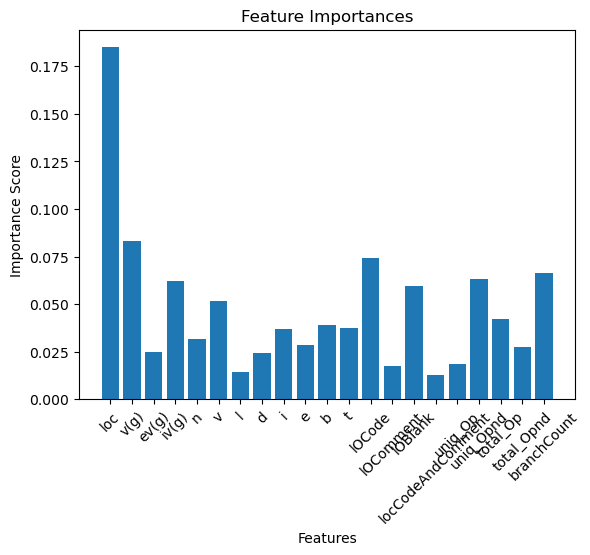

In [22]:
import matplotlib.pyplot as plt

plt.bar(features.columns, feature_importances )
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.show()